In [ ]:
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [ ]:
train_values = pd.read_csv('/content/train_values.csv')
train_labels = pd.read_csv('/content/train_labels.csv')
test_values = pd.read_csv('/content/test_values.csv')
test_labels = pd.read_csv('/content/submission.csv')

In [ ]:
print("# Train Values: {}".format(train_values.shape))
print("# Train Labels: {}".format(train_labels.shape))
print("# Test Values: {}".format(test_values.shape))
print("# Test Labels: {}".format(test_labels.shape))

# Train Values: (260601, 39)
# Train Labels: (260601, 2)
# Test Values: (86868, 39)
# Test Labels: (86868, 2)


### Deal with outliers in a dataset by replacing extreme values with less extreme ones


In [ ]:
name = "age"
data = train_values[name]

winsorized_data = winsorize(data,(0, 0.05))

train_values[name] = winsorized_data

In [ ]:
name = "area_percentage"
data = train_values[name]

winsorized_data = winsorize(data,(0, 0.055))
train_values[name] = winsorized_data

In [ ]:

name = "height_percentage"
data = train_values[name]
winsorized_data = winsorize(data,(0, 0.04))
train_values[name] = winsorized_data

# Correlations


In [ ]:
buildingId_train = train_values["building_id"].copy()
train_values.drop(columns=["building_id"], inplace=True)
train_labels.drop(columns=["building_id"], inplace=True)
test_values.drop(columns=["building_id"], inplace=True)
test_labels.drop(columns=["building_id"], inplace=True)

In [ ]:
train_values_new = pd.get_dummies(train_values, drop_first = True)
test_values_new = pd.get_dummies(test_values, drop_first = True)

In [ ]:
# !pip install scikit-learn

from sklearn.metrics import f1_score as score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import time
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#cross_val_predict: #The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set
from sklearn.model_selection import cross_val_predict

#Compute confusion matrix to evaluate the accuracy of a classification.
#model precision score measures the proportion of positively predicted labels that are actually correct, Precision Score = TP / (FP + TP) ( positive predictive value)
#recall_score :the model’s ability to correctly predict the positives out of actual positives. Recall Score = TP / (FN + TP)
#accuracy score :In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
#f1_score : F1 score reaches its best value at 1 and worst score at 0. F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import confusion_matrix , precision_score, recall_score  ,accuracy_score ,f1_score, classification_report
from sklearn.metrics import precision_recall_curve


# DecisionTreeClassifier() :  breaking down a dataset into smaller and smaller subsets based on different criteria.
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression  : outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.
#The SGDClassifier applies regularized linear model with SGD learning to build an estimator.
from sklearn.linear_model import SGDClassifier, LogisticRegression

#A random forest : is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
from sklearn.ensemble import RandomForestClassifier

##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
#precision recall tradeoff , function to plot presicion and recall and thresholds
def plot_precision_recall_vs_thresholds(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(visible=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


from sklearn.preprocessing import label_binarize

In [ ]:
data=train_values_new
data_labels=train_labels
data_test=test_values_new
data_test_labels=test_labels

# RandomForestClassifier with different values for each parameter

In [ ]:
#RandomForestClassifier() : fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting
#random foreign  employs averaging to increase predicted accuracy and reduce overfitting
#here one denotes that loan approved and zero means loan will not approve so accuracy is quite less

data=train_values_new
data_labels=train_labels
data_test=test_values_new
data_test_labels=test_labels

RF_clf2=RandomForestClassifier(n_estimators=1,min_samples_split=20,max_depth=7,max_features=1)
RF_clf2.fit(data, data_labels)
y_pred=RF_clf2.predict(data_test)


y_train_pred = cross_val_predict(RF_clf2, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision = precision_score(data_labels, y_train_pred, average='weighted')

# Recall Score = TP / (FN + TP)
RF_clf_recall = recall_score(data_labels, y_train_pred, average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1 = f1_score(data_labels, y_train_pred, average='weighted')

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)


# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(RF_clf2, data, data_labels, cv=3)

sc = cross_val_score(RF_clf2, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.5721505289695742

y_pred         :
 [2 2 2 ... 2 2 2]
confusion matrix:
 [[  4240  20829     55]
 [  3386 144609    264]
 [   363  86601    254]]
RF_clf_precision    :  0.5259407715469778
RF_clf_recall       :  0.5721505289695742
RF_clf_f1           :  0.43766863841142967
RF_clf_accuracy     :  0.5721505289695742
y_scores         :
 [2 2 2 ... 2 2 2]
sc               : [0.56987118 0.56898477 0.57539687]


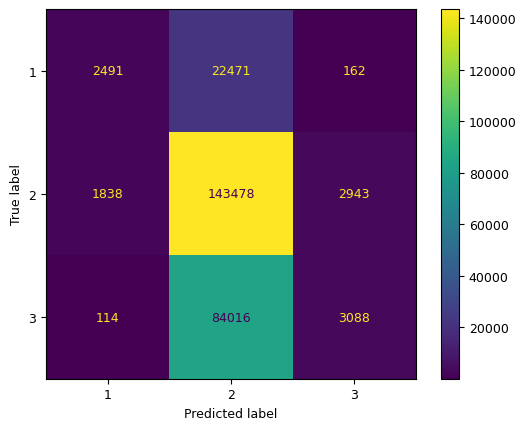

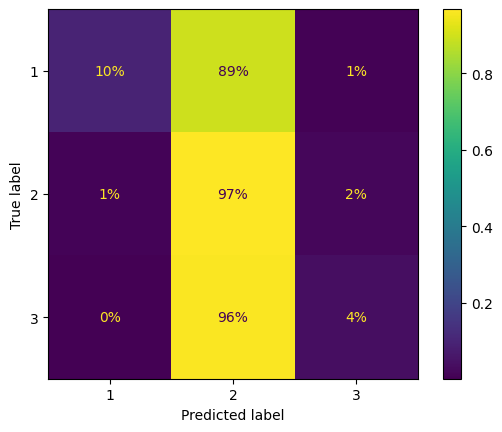

In [ ]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)

from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(RF_clf2, data, data_labels, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
RF_clf=RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
RF_clf.fit(data, data_labels)
y_pred=RF_clf.predict(data_test)


y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision=precision_score(data_labels,y_train_pred ,average='weighted')

# Recall Score = TP / (FN + TP)
RF_clf_recall=recall_score(data_labels,y_train_pred ,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1=f1_score(data_labels,y_train_pred ,average='weighted')

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)

# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(RF_clf, data, data_labels, cv=3)
sc = cross_val_score(RF_clf, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.5689118614280068

y_pred         :
 [2 2 2 ... 2 2 2]
confusion matrix:
 [[     1  25123      0]
 [     1 148258      0]
 [     0  87218      0]]
RF_clf_precision    :  0.3718649662649312
RF_clf_recall       :  0.5689118614280068
RF_clf_f1           :  0.4125995016895712
RF_clf_accuracy     :  0.5689118614280068
y_scores         :
 [2 2 2 ... 2 2 2]
sc               : [0.56896175 0.57002084 0.56893872]


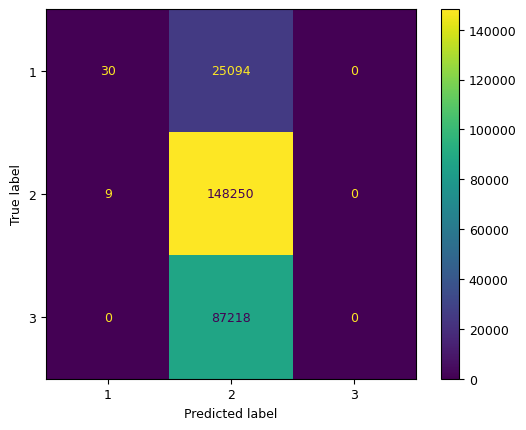

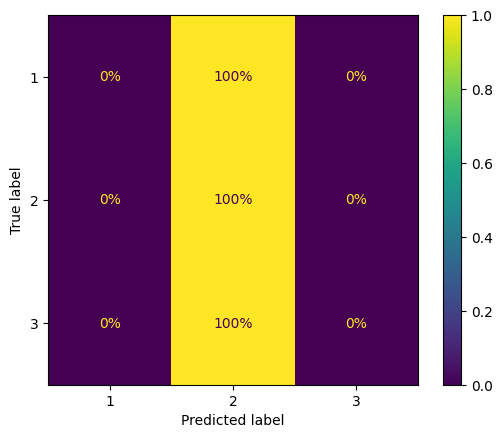

In [ ]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)





from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
RF_clf=RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
RF_clf.fit(data, data_labels)
y_pred=RF_clf.predict(data_test)


y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
RF_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
RF_clf_precision=precision_score(data_labels,y_train_pred ,average='weighted')

# Recall Score = TP / (FN + TP)
RF_clf_recall=recall_score(data_labels,y_train_pred ,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
RF_clf_f1=f1_score(data_labels,y_train_pred ,average='weighted')

#accuracy score :
RF_clf_accuracy=accuracy_score(data_labels,y_train_pred)

# the function cross_val_predict() return decision scores instead of prediction :
RF_clf_y_scores = cross_val_predict(RF_clf, data, data_labels, cv=3)
sc = cross_val_score(RF_clf, data, data_labels, cv=3,scoring="accuracy")

RF_clf_accuracy

0.7287961289480854

y_pred         :
 [3 2 2 ... 2 2 2]
confusion matrix:
 [[ 10520  14305    299]
 [  4597 126650  17012]
 [   368  34095  52755]]
RF_clf_precision    :  0.7291001738787238
RF_clf_recall       :  0.7287961289480854
RF_clf_f1           :  0.720182119375201
RF_clf_accuracy     :  0.7287961289480854
y_scores         :
 [3 2 3 ... 3 2 3]
sc               : [0.72754901 0.72978231 0.72905706]


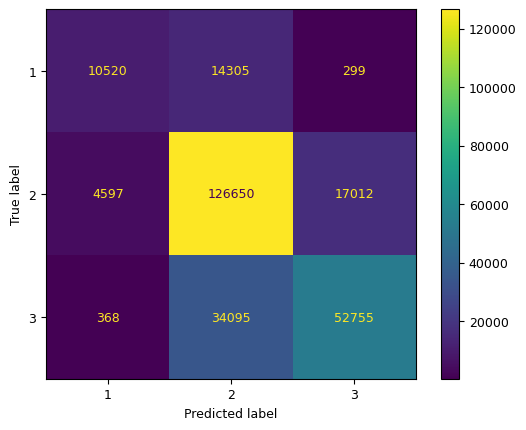

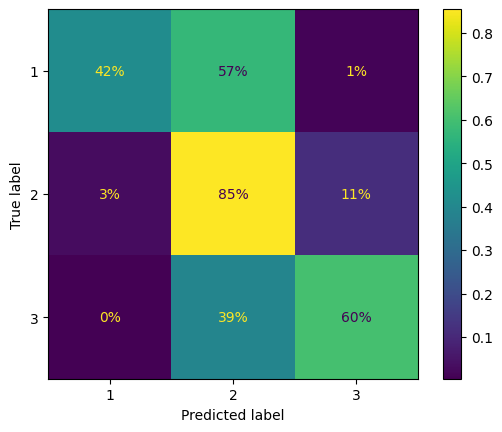

In [ ]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",RF_clf_cm)
print("RF_clf_precision    : ",RF_clf_precision)
print("RF_clf_recall       : ",RF_clf_recall)
print("RF_clf_f1           : " ,RF_clf_f1)
print("RF_clf_accuracy     : ",RF_clf_accuracy)
print("y_scores         :\n" ,RF_clf_y_scores)
print("sc               :" ,sc)


from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(RF_clf, data, data_labels, cv=3)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

# SGDClassifier

In [ ]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(data, data_labels)
y_pred=sgd_clf.predict(data_test)
y_train_pred_sgd= cross_val_predict(sgd_clf, data, data_labels, cv=3)

##CONFUSION MATRIX : #CONFUSION MATRIX : to summarizes the performance of a classification model or algorithm:first row is the negative class , seconed row for positive class
cm=confusion_matrix(data_labels,y_train_pred_sgd)

#Precision Score = TP / (FP + TP) ( positive predictive value)
sgd_precision=precision_score(data_labels,y_train_pred_sgd ,average='weighted')

# Recall Score = TP / (FN + TP)
sgd_recall=recall_score(data_labels,y_train_pred_sgd,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
sgd_f1=f1_score(data_labels,y_train_pred_sgd,average='weighted')

#accuracy score :
sgd_accuracy=accuracy_score(data_labels,y_train_pred_sgd)

#the function cross_val_predict() return decision scores instead of prediction :
sgd_y_scores = cross_val_predict(sgd_clf, data, data_labels, cv=3)


sgd_accuracy

0.49606870272945996

y_pred          :
 [2 2 2 ... 2 2 2]
confusion matrix :
 [[ 2932 15138  7054]
 [ 2924 90153 55182]
 [  392 50635 36191]]
sgd_precision    :  0.4972335947294387
sgd_recall       :  0.49606870272945996
sgd_f1           :  0.4857335866644332
sgd_accuracy     :  0.49606870272945996
y_scores         :
 [2 2 2 ... 3 1 3]


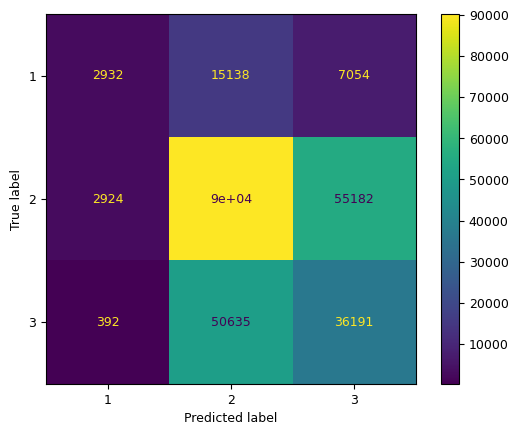

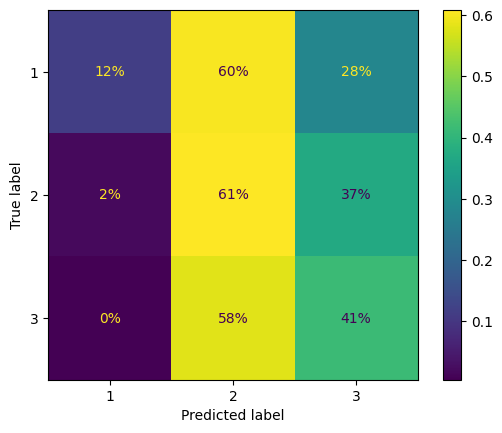

In [ ]:
print ("y_pred          :\n",y_pred)
print("confusion matrix :\n",cm)
print("sgd_precision    : ",sgd_precision)
print("sgd_recall       : ",sgd_recall)
print("sgd_f1           : " ,sgd_f1)
print("sgd_accuracy     : ",sgd_accuracy)
print("y_scores         :\n" ,sgd_y_scores)




from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred_sgd, normalize="true", values_format=".0%")
plt.show()


In [ ]:
# SGDClassifier with parameters for big data
sgd_big_data = SGDClassifier(
    loss='hinge',  # Specify the loss function (e.g., hinge for linear SVM)
    penalty='l2',  # Specify the regularization penalty (e.g., L2)
    alpha=0.0001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

# Training
start_time = time.time()
sgd_big_data.fit(train_values_new, train_labels)
sgd_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
sgd_big_data.predict(test_values_new)
sgd_time_pred = time.time() - start_time

# Print Results
print("SGDClassifier for Big Data")
print("Fit Time: {} seconds".format(sgd_time_fit))
print("Prediction Time: {} seconds".format(sgd_time_pred))
print("Training Score: {}".format(sgd_big_data.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, sgd_big_data.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(sgd_big_data.score(test_values_new, test_labels)))
print("----------------------------------------")

# KNeighborsClassifier with different values for each parameter


In [ ]:
#Nearest Neighbors Classification :##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
kn_clf=KNeighborsClassifier(n_neighbors=3,weights='distance')
kn_clf.fit(data, data_labels)
#calculating accuracy
y_pred=kn_clf.predict(data_test)
y_train_pred = cross_val_predict(kn_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
kn_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
kn_clf_precision=precision_score(data_labels,y_train_pred,average='weighted')

# Recall Score = TP / (FN + TP)
kn_clf_recall=recall_score(data_labels,y_train_pred,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
kn_clf_f1=f1_score(data_labels,y_train_pred,average='weighted')

#accuracy score :
kn_clf_accuracy=accuracy_score(data_labels,y_train_pred)

#the function cross_val_predict() return decision scores instead of prediction :
kn_clf_y_scores = cross_val_predict(kn_clf, data, data_labels, cv=3)

kn_clf_accuracy

0.687622073591429

y_pred         :
 [3 2 3 ... 2 2 1]
confusion matrix:
 [[ 12428  11081   1615]
 [  8571 111585  28103]
 [  1350  30686  55182]]
kn_clf_precision    :  0.6851044012818313
kn_clf_recall       :  0.687622073591429
kn_clf_f1           :  0.686031176255758
kn_clf_y_scores         :
 [2 2 3 ... 3 1 3]


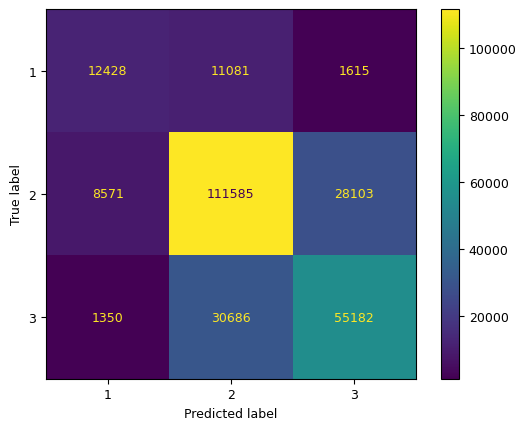

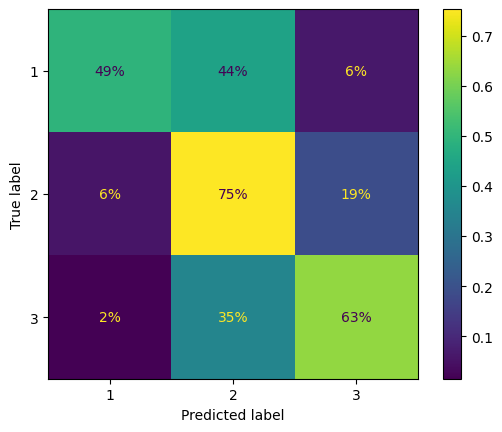

In [ ]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",kn_clf_cm)
print("kn_clf_precision    : ",kn_clf_precision)
print("kn_clf_recall       : ",kn_clf_recall)
print("kn_clf_f1           : " ,kn_clf_f1)
print("kn_clf_y_scores         :\n" ,kn_clf_y_scores)



from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred)
plt.show()


plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [ ]:
#Nearest Neighbors Classification :##The neighbors number is important in this method. Selecting the right number of neighbors provides the more accurate results.
kn_clf=KNeighborsClassifier(n_neighbors=20,weights='uniform')
kn_clf.fit(data, data_labels)

#CONFUSION MATRIX : to describe the performance of a classification model
kn_clf_cm=confusion_matrix(data_labels,y_train_pred)

#Precision Score = TP / (FP + TP) ( positive predictive value)
kn_clf_precision=precision_score(data_labels,y_train_pred,average='weighted')

# Recall Score = TP / (FN + TP)
kn_clf_recall=recall_score(data_labels,y_train_pred,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
kn_clf_f1=f1_score(data_labels,y_train_pred,average='weighted')

#accuracy score :
kn_clf_accuracy=accuracy_score(data_labels,y_train_pred)

#the function cross_val_predict() return decision scores instead of prediction :
kn_clf_y_scores = cross_val_predict(kn_clf, data, data_labels, cv=3)
kn_clf_accuracy

0.6931899724099293

y_pred         :
 [3 2 3 ... 2 2 1]
confusion matrix:
 [[  9802  13614   1708]
 [  5125 122356  20778]
 [  1001  37729  48488]]
kn_clf_precision    :  0.6887250878681943
kn_clf_recall       :  0.6931899724099293
kn_clf_f1           :  0.6836220658726151
kn_clf_y_scores         :
 [3 2 3 ... 3 2 3]


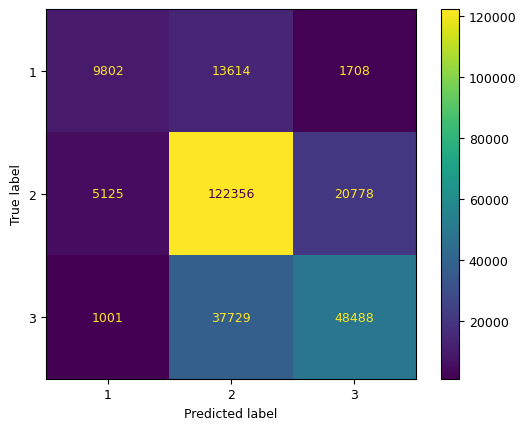

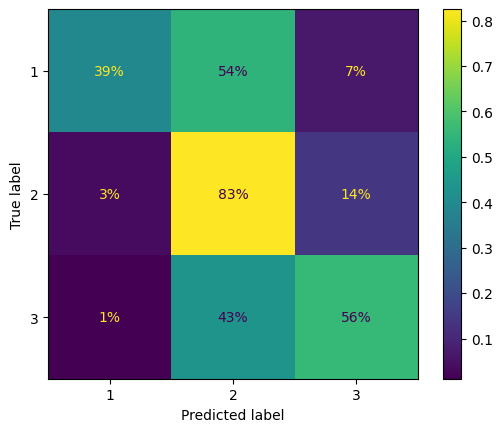

In [ ]:
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",kn_clf_cm)
print("kn_clf_precision    : ",kn_clf_precision)
print("kn_clf_recall       : ",kn_clf_recall)
print("kn_clf_f1           : " ,kn_clf_f1)
print("kn_clf_y_scores         :\n" ,kn_clf_y_scores)



from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, kn_clf_y_scores)
plt.show()


plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

# GaussianNB

In [ ]:
#GaussianNB() :to find the probabilistic approach and Gaussian distribution.
from sklearn.naive_bayes import GaussianNB
gu_clf=GaussianNB()
gu_clf.fit(data, data_labels)


gu_clf_y_scores = cross_val_predict(gu_clf, data, data_labels, cv=3)
#CONFUSION MATRIX : to describe the performance of a classification model
gu_clf_cm=confusion_matrix(data_labels,gu_clf_y_scores)


#Precision Score = TP / (FP + TP) ( positive predictive value)
gu_clf_precision=precision_score(data_labels,gu_clf_y_scores,average='weighted')

# Recall Score = TP / (FN + TP)
gu_clf_recall=recall_score(data_labels,gu_clf_y_scores,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
gu_clf_f1=f1_score(data_labels,gu_clf_y_scores,average='weighted')

#accuracy score :
gu_clf_accuracy=accuracy_score(data_labels,gu_clf_y_scores)


#the function cross_val_predict() return decision scores instead of prediction :

gu_clf_accuracy

0.43198606298517656

y_pred         :
 [3 2 3 ... 2 2 1]
confusion matrix:
 [[ 13837   3299   7988]
 [ 17028  20310 110921]
 [  2115   6674  78429]]
gu_clf_precision    :  0.5550162365139608
gu_clf_recall       :  0.43198606298517656
gu_clf_f1           :  0.35983875001114773
gu_clf_accuracy     :  0.43198606298517656
gu_clf_y_scores         :
 [3 3 3 ... 3 1 3]


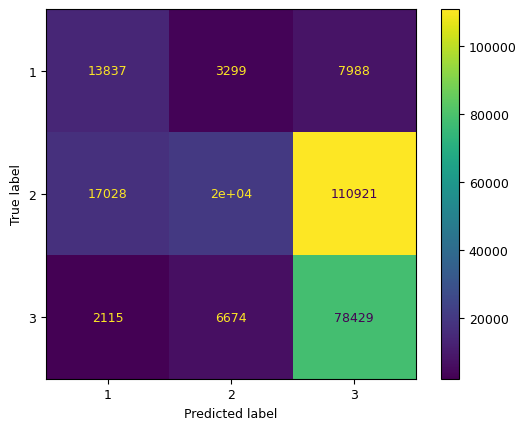

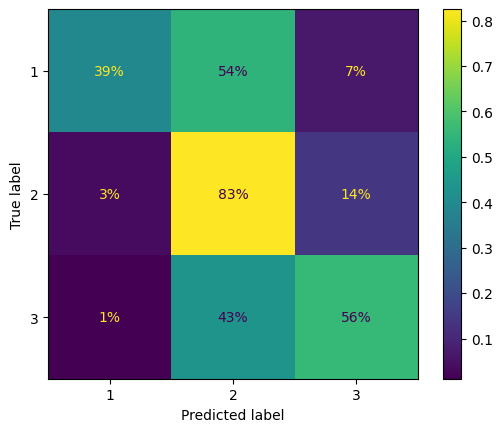

In [ ]:
y_pred_ga=gu_clf.predict(data_test)

print("confusion matrix:\n",gu_clf_cm)
print("gu_clf_precision    : ",gu_clf_precision)
print("gu_clf_recall       : ",gu_clf_recall)
print("gu_clf_f1           : " ,gu_clf_f1)
print("gu_clf_accuracy     : ",gu_clf_accuracy)
print("gu_clf_y_scores         :\n" ,gu_clf_y_scores)




from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, gu_clf_y_scores)
plt.show()



plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

# LogisticRegression

In [ ]:
#LogisticRegression() :utputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.
lo_m=LogisticRegression()
lo_m.fit(data, data_labels)


y_train_pred_lo= cross_val_predict(lo_m, data, data_labels, cv=3)

##CONFUSION MATRIX : #CONFUSION MATRIX : to summarizes the performance of a classification
lo_cm=confusion_matrix(data_labels,y_train_pred_lo)

#Precision Score = TP / (FP + TP) ( positive predictive value)
lo_precision=precision_score(data_labels,y_train_pred_lo,average='weighted')

# Recall Score = TP / (FN + TP)
lo_recall=recall_score(data_labels,y_train_pred_lo,average='weighted')

#the F1 score combines the percisions andrecall in one metric , F1 = 2 * (precision * recall) / (precision + recall)
lo_f1=f1_score(data_labels,y_train_pred_lo,average='weighted')

#accuracy score :
lo_accuracy=accuracy_score(data_labels,y_train_pred_lo)

#the function cross_val_predict() return decision scores instead of prediction :
lo_y_scores = y_train_pred_lo


lo_accuracy

0.5688159293325812

y_pred         :
 [3 2 3 ... 2 2 1]
confusion matrix:
 [[  2009  23114      1]
 [  2023 146207     29]
 [   553  86647     18]]
lo_precision    :  0.49270612579946027
lo_recall       :  0.5688159293325812
lo_f1           :  0.42472225141816106
lo_accuracy     :  0.5688159293325812
y_scores         :
 [2 2 2 ... 2 2 2]


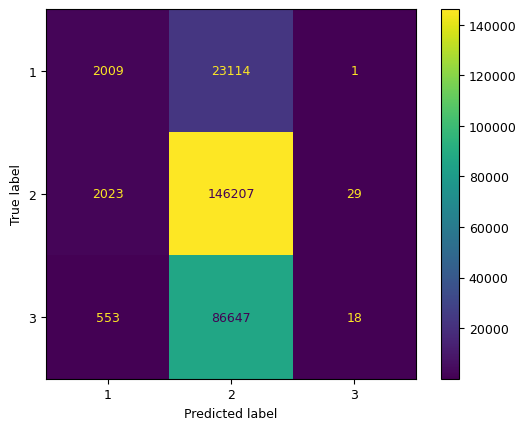

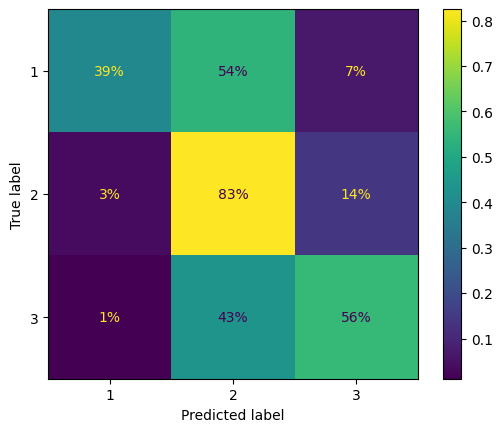

In [ ]:
y_pred_log=lo_m.predict(data_test)
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",lo_cm)
print("lo_precision    : ",lo_precision)
print("lo_recall       : ",lo_recall)
print("lo_f1           : " ,lo_f1)
print("lo_accuracy     : ",lo_accuracy)
print("y_scores         :\n" ,lo_y_scores)



from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred_lo)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:

# Decision Tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(data, data_labels)


# Make predictions using cross-validation
y_train_pred_dt = cross_val_predict(dt_classifier, data, data_labels, cv=3)

# CONFUSION MATRIX
dt_cm = confusion_matrix(data_labels, y_train_pred_dt)

# Precision Score
dt_precision = precision_score(data_labels, y_train_pred_dt, average='weighted')

# Recall Score
dt_recall = recall_score(data_labels, y_train_pred_dt, average='weighted')

# F1 Score
dt_f1 = f1_score(data_labels, y_train_pred_dt, average='weighted')

# Accuracy Score
dt_accuracy = accuracy_score(data_labels, y_train_pred_dt)

dt_accuracy


0.6401587100586721

y_pred         :
 [3 2 2 ... 2 2 2]
confusion matrix:
 [[  6408  18564    152]
 [  4103 134681   9475]
 [   223  61258  25737]]
dt_precision    :  0.6583306603179717
dt_recall       :  0.6401587100586721
dt_f1           :  0.5974289671398771
dt_accuracy     :  0.6401587100586721
y_scores         :
 [2 2 2 ... 3 2 2]


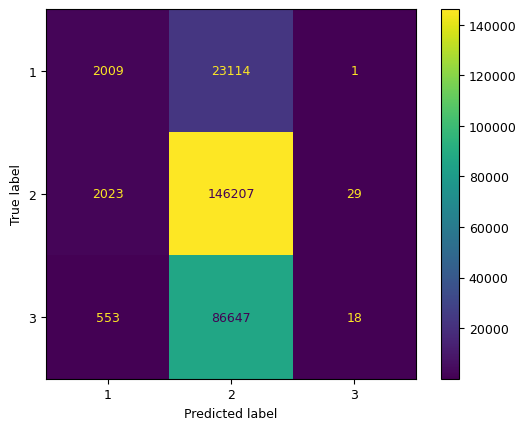

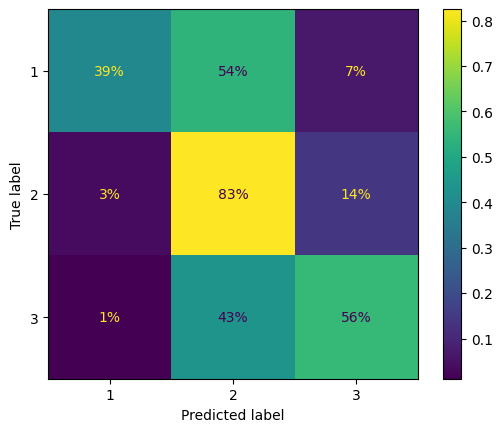

In [ ]:
y_pred=dt_classifier.predict(data_test)
print ("y_pred         :\n",y_pred)
print("confusion matrix:\n",dt_cm)
print("dt_precision    : ",dt_precision)
print("dt_recall       : ",dt_recall)
print("dt_f1           : " ,dt_f1)
print("dt_accuracy     : ",dt_accuracy)
print("y_scores         :\n" ,y_train_pred_dt)


from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred_lo)
plt.show()

plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(data_labels, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [ ]:
X = train_values_new
y = train_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(X_train, y_train)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(X_train, y_train)))
print("Test Score: {}".format(dt.score(X_test, y_test)))
print("----------------------------------------")

#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(X_train, y_train)
rf_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(X_test)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(X_train, y_train)))
print("Test Score: {}".format(rf.score(X_test, y_test)))

Decision Tree
Fit Time: 2.017505645751953 seconds
Prediction Time: 0.03120732307434082 seconds
Training Score: 0.748661742133538
Test Score: 0.7168895454807084
----------------------------------------
Random Forest
Fit Time: 135.50102949142456 seconds
Prediction Time: 0.9992074966430664 seconds
Training Score: 0.7549932847275518
Test Score: 0.7307994858118608


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")

Decision Tree
Fit Time: 2.693953275680542 seconds
Prediction Time: 0.04828333854675293 seconds
Training Score: 0.7494176921807668
Test Score: 0.6580789243449832
----------------------------------------


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_features = "sqrt",
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")


Decision Tree
Fit Time: 1.6442224979400635 seconds
Prediction Time: 0.07124185562133789 seconds
Training Score: 0.647157915740922
Test Score: 0.7398466639038541
----------------------------------------


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_features = "log2",
                            max_depth = 45,
                            min_samples_split = 2,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = dt.fit(train_values_new, train_labels)
dt_time_fit = time.time() - start_time

#Predictions - Decision Tree
start_time = time.time()
model.predict(test_values_new)
dt_time_pred = time.time() - start_time
print("Decision Tree")
print("Fit Time: {} seconds".format(dt_time_fit))
print("Prediction Time: {} seconds".format(dt_time_pred))
print("Training Score: {}".format(dt.score(train_values_new, train_labels)))
print("Test Score: {}".format(dt.score(test_values_new, test_labels)))
print("----------------------------------------")

Decision Tree
Fit Time: 0.8651056289672852 seconds
Prediction Time: 0.05603313446044922 seconds
Training Score: 0.6185164293306625
Test Score: 0.7854560943040014
----------------------------------------


In [ ]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(train_values_new, train_labels)
rf_time_fit = time.time() - start_time

#Predictions - Random Forest
start_time = time.time()
model.predict(test_values_new)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(train_values_new, train_labels)))
print("Test Score: {}".format(rf.score(test_values_new, test_labels)))
print("----------------------------------------")

Random Forest
Fit Time: 231.32115006446838 seconds
Prediction Time: 2.8100037574768066 seconds
Training Score: 0.7558336307228292
Test Score: 0.6798590965602984
----------------------------------------


In [ ]:
#Random Forest
rf = RandomForestClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)
start_time = time.time()
model = rf.fit(train_values_new, train_labels)
rf_time_fit = time.time() - start_time

#Predictions - Random Forest
start_time = time.time()
model.predict(test_values_new)
rf_time_pred = time.time() - start_time
print("Random Forest")
print("Fit Time: {} seconds".format(rf_time_fit))
print("Prediction Time: {} seconds".format(rf_time_pred))
print("Training Score: {}".format(rf.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, model.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(rf.score(test_values_new, test_labels)))
print("----------------------------------------")

Random Forest
Fit Time: 209.65336108207703 seconds
Prediction Time: 2.3787689208984375 seconds
Training Score: 0.7558336307228292
Training F1 Score: 0.7486031984248882
Test Score: 0.6798590965602984
----------------------------------------


# catboost

In [ ]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.6 MB/s eta 0:00:00


In [ ]:
import catboost as cb
import catboost.datasets as cbd
import catboost.utils as cbu
from catboost.utils import create_cd
import catboost as cb
from sklearn.metrics import f1_score
import time


In [ ]:

# CatBoost Classifier
catboost_model = cb.CatBoostClassifier(
    max_depth=10,
    iterations=100,
    learning_rate=0.1,
    loss_function='MultiClass',
    random_state=42,
    cat_features=[]  # Add categorical features indices if applicable
)

# Training
start_time = time.time()
catboost_model.fit(train_values_new, train_labels)
catboost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
catboost_model.predict(test_values_new)
catboost_time_pred = time.time() - start_time

# Print Results
print("CatBoost Classifier")
print("Fit Time: {} seconds".format(catboost_time_fit))
print("Prediction Time: {} seconds".format(catboost_time_pred))
print("Training Score: {}".format(catboost_model.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, catboost_model.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(catboost_model.score(test_values_new, test_labels)))
print("----------------------------------------")


0:	learn: 1.0397360	total: 1.38s	remaining: 2m 16s
1:	learn: 0.9916497	total: 2.4s	remaining: 1m 57s
2:	learn: 0.9516927	total: 3.38s	remaining: 1m 49s
3:	learn: 0.9188669	total: 4.2s	remaining: 1m 40s
4:	learn: 0.8927323	total: 5.02s	remaining: 1m 35s
5:	learn: 0.8687161	total: 5.75s	remaining: 1m 30s
6:	learn: 0.8482761	total: 6.55s	remaining: 1m 27s
7:	learn: 0.8305145	total: 7.3s	remaining: 1m 24s
8:	learn: 0.8151518	total: 8.15s	remaining: 1m 22s
9:	learn: 0.8025350	total: 8.57s	remaining: 1m 17s
10:	learn: 0.7912754	total: 8.99s	remaining: 1m 12s
11:	learn: 0.7820148	total: 9.82s	remaining: 1m 12s
12:	learn: 0.7734306	total: 10.5s	remaining: 1m 10s
13:	learn: 0.7660411	total: 11.8s	remaining: 1m 12s
14:	learn: 0.7582289	total: 12.9s	remaining: 1m 12s
15:	learn: 0.7521629	total: 13.9s	remaining: 1m 13s
16:	learn: 0.7473720	total: 15.1s	remaining: 1m 13s
17:	learn: 0.7429671	total: 16.4s	remaining: 1m 14s
18:	learn: 0.7385683	total: 17.1s	remaining: 1m 13s
19:	learn: 0.7333732	tota

In [ ]:

# CatBoost Classifier with different parameters
catboost_model = cb.CatBoostClassifier(
    depth=6,
    iterations=500,
    learning_rate=0.05,
    loss_function='MultiClass',
    random_state=42,
    l2_leaf_reg=3,
    od_type='Iter',
    od_wait=50,
    cat_features=[]
)

# Training
start_time = time.time()
catboost_model.fit(train_values_new, train_labels)
catboost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
catboost_model.predict(test_values_new)
catboost_time_pred = time.time() - start_time

# Print Results
print("CatBoost Classifier")
print("Fit Time: {} seconds".format(catboost_time_fit))
print("Prediction Time: {} seconds".format(catboost_time_pred))
print("Training Score: {}".format(catboost_model.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, catboost_model.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(catboost_model.score(test_values_new, test_labels)))
print("----------------------------------------")


0:	learn: 1.0710921	total: 370ms	remaining: 3m 4s
1:	learn: 1.0462688	total: 679ms	remaining: 2m 49s
2:	learn: 1.0238740	total: 995ms	remaining: 2m 44s
3:	learn: 1.0037462	total: 1.42s	remaining: 2m 56s
4:	learn: 0.9855029	total: 1.79s	remaining: 2m 56s
5:	learn: 0.9690571	total: 2.54s	remaining: 3m 29s
6:	learn: 0.9535421	total: 3.09s	remaining: 3m 37s
7:	learn: 0.9398540	total: 3.38s	remaining: 3m 27s
8:	learn: 0.9269222	total: 3.66s	remaining: 3m 19s
9:	learn: 0.9148621	total: 3.92s	remaining: 3m 12s
10:	learn: 0.9028080	total: 4.17s	remaining: 3m 5s
11:	learn: 0.8921796	total: 4.38s	remaining: 2m 58s
12:	learn: 0.8819456	total: 4.65s	remaining: 2m 54s
13:	learn: 0.8729788	total: 4.92s	remaining: 2m 50s
14:	learn: 0.8641528	total: 5.17s	remaining: 2m 47s
15:	learn: 0.8560824	total: 5.39s	remaining: 2m 43s
16:	learn: 0.8486217	total: 5.75s	remaining: 2m 43s
17:	learn: 0.8419363	total: 5.98s	remaining: 2m 40s
18:	learn: 0.8353764	total: 6.2s	remaining: 2m 37s
19:	learn: 0.8297258	tota

# HistGradientBoostingClassifier

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score
import time

In [ ]:
# HistGradientBoostingClassifier
hist_grad_boost = HistGradientBoostingClassifier(
    max_iter=100,
    learning_rate=0.1,
    max_depth=10,
    min_samples_leaf=30,
    random_state=42
)

# Training
start_time = time.time()
hist_grad_boost.fit(train_values_new, train_labels)
hist_grad_boost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
hist_grad_boost.predict(test_values_new)
hist_grad_boost_time_pred = time.time() - start_time

# Print Results
print("HistGradientBoostingClassifier")
print("Fit Time: {} seconds".format(hist_grad_boost_time_fit))
print("Prediction Time: {} seconds".format(hist_grad_boost_time_pred))
print("Training Score: {}".format(hist_grad_boost.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, hist_grad_boost.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(hist_grad_boost.score(test_values_new, test_labels)))
print("----------------------------------------")


HistGradientBoostingClassifier
Fit Time: 48.71713328361511 seconds
Prediction Time: 2.1586315631866455 seconds
Training Score: 0.7258529322604288
Training F1 Score: 0.7169270458506424
Test Score: 0.6923723350370677
----------------------------------------


In [ ]:
# HistGradientBoostingClassifier with different parameters
hist_grad_boost = HistGradientBoostingClassifier(
    max_iter=200,
    learning_rate=0.05,
    max_depth=8,
    min_samples_leaf=20,
    max_leaf_nodes=31,
    random_state=42
)

# Training
start_time = time.time()
hist_grad_boost.fit(train_values_new, train_labels)
hist_grad_boost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
hist_grad_boost.predict(test_values_new)
hist_grad_boost_time_pred = time.time() - start_time

# Print Results
print("HistGradientBoostingClassifier")
print("Fit Time: {} seconds".format(hist_grad_boost_time_fit))
print("Prediction Time: {} seconds".format(hist_grad_boost_time_pred))
print("Training Score: {}".format(hist_grad_boost.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, hist_grad_boost.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(hist_grad_boost.score(test_values_new, test_labels)))
print("----------------------------------------")


HistGradientBoostingClassifier
Fit Time: 86.36594676971436 seconds
Prediction Time: 5.481322526931763 seconds
Training Score: 0.7242451103410962
Training F1 Score: 0.7152200171576807
Test Score: 0.6943638624119354
----------------------------------------


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# GradientBoostingClassifier with different parameters
grad_boost = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)

# Training
start_time = time.time()
grad_boost.fit(train_values_new, train_labels)
grad_boost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
grad_boost.predict(test_values_new)
grad_boost_time_pred = time.time() - start_time

# Print Results
print("GradientBoostingClassifier")
print("Fit Time: {} seconds".format(grad_boost_time_fit))
print("Prediction Time: {} seconds".format(grad_boost_time_pred))
print("Training Score: {}".format(grad_boost.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, grad_boost.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(grad_boost.score(test_values_new, test_labels)))
print("----------------------------------------")


GradientBoostingClassifier
Fit Time: 784.7340400218964 seconds
Prediction Time: 1.978133201599121 seconds
Training Score: 0.7273648220843358
Training F1 Score: 0.7181931015859854
Test Score: 0.6947437491366211
----------------------------------------


In [ ]:
# GradientBoostingClassifier with parameters for big data
grad_boost_big_data = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=500,  # Adjust based on the size of your dataset
    min_samples_leaf=50,    # Adjust based on the size of your dataset
    subsample=0.8,          # Subsample to use only a fraction of the data
    random_state=42
)

# Training
start_time = time.time()
grad_boost_big_data.fit(train_values_new, train_labels)
grad_boost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
grad_boost_big_data.predict(test_values_new)
grad_boost_time_pred = time.time() - start_time

# Print Results
print("GradientBoostingClassifier for Big Data")
print("Fit Time: {} seconds".format(grad_boost_time_fit))
print("Prediction Time: {} seconds".format(grad_boost_time_pred))
print("Training Score: {}".format(grad_boost_big_data.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, grad_boost_big_data.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(grad_boost_big_data.score(test_values_new, test_labels)))
print("----------------------------------------")


GradientBoostingClassifier for Big Data
Fit Time: 321.066282749176 seconds
Prediction Time: 1.0451843738555908 seconds
Training Score: 0.7065475573769863
Training F1 Score: 0.6951236372452234
Test Score: 0.7054381360224709
----------------------------------------


#AdaBoostClassifier


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#  AdaBoostClassifier with parameters for big data
adaboost_big_data = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=0.1,
    algorithm='SAMME.R',  # SAMME.R is often more efficient for big datasets
    random_state=42
)

# Training
start_time = time.time()
adaboost_big_data.fit(train_values_new, train_labels)
adaboost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
adaboost_big_data.predict(test_values_new)
adaboost_time_pred = time.time() - start_time

# Print Results
print("AdaBoostClassifier for Big Data")
print("Fit Time: {} seconds".format(adaboost_time_fit))
print("Prediction Time: {} seconds".format(adaboost_time_pred))
print("Training Score: {}".format(adaboost_big_data.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, adaboost_big_data.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(adaboost_big_data.score(test_values_new, test_labels)))
print("----------------------------------------")


AdaBoostClassifier for Big Data
Fit Time: 26.940903902053833 seconds
Prediction Time: 1.272179365158081 seconds
Training Score: 0.5723922778500466
Training F1 Score: 0.42869370887394664
Test Score: 0.8682253534097711
----------------------------------------


In [ ]:
# AdaBoostClassifier with alternative parameters for big data
adaboost_big_data_alternative = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.05,
    algorithm='SAMME',  # SAMME can also be used for big datasets
    random_state=42
)

# Training
start_time = time.time()
adaboost_big_data_alternative.fit(train_values_new, train_labels)
adaboost_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
adaboost_big_data_alternative.predict(test_values_new)
adaboost_time_pred = time.time() - start_time

# Print Results
print("AdaBoostClassifier for Big Data (Alternative Parameters)")
print("Fit Time: {} seconds".format(adaboost_time_fit))
print("Prediction Time: {} seconds".format(adaboost_time_pred))
print("Training Score: {}".format(adaboost_big_data_alternative.score(train_values_new, train_labels)))
print("Training F1 Score: {}".format(f1_score(train_labels, adaboost_big_data_alternative.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(adaboost_big_data_alternative.score(test_values_new, test_labels)))
print("----------------------------------------")


AdaBoostClassifier for Big Data (Alternative Parameters)
Fit Time: 44.41641879081726 seconds
Prediction Time: 1.2439446449279785 seconds
Training Score: 0.5689118614280068
Training F1 Score: 0.41259259239570933
Test Score: 0.8675001151171893
----------------------------------------


In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Adjust labels to start from 0
train_labels_adjusted = train_labels - 1
test_labels_adjusted = test_labels - 1

# XGBClassifier with parameters for big data and three classes
xgb_big_data = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',  # Specify the objective for multiclass classification
    num_class=3,  # Specify the number of classes (in this case, 3)
    random_state=42
)

# Training
start_time = time.time()
xgb_big_data.fit(train_values_new, train_labels_adjusted)
xgb_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
xgb_big_data.predict(test_values_new)
xgb_time_pred = time.time() - start_time

# Print Results
print("XGBClassifier for Big Data (Three Classes)")
print("Fit Time: {} seconds".format(xgb_time_fit))
print("Prediction Time: {} seconds".format(xgb_time_pred))
print("Training Score: {}".format(xgb_big_data.score(train_values_new, train_labels_adjusted)))
print("Training F1 Score: {}".format(f1_score(train_labels_adjusted, xgb_big_data.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(xgb_big_data.score(test_values_new, test_labels_adjusted)))
print("----------------------------------------")


XGBClassifier for Big Data (Three Classes)
Fit Time: 25.13061285018921 seconds
Prediction Time: 0.47319531440734863 seconds
Training Score: 0.6981861159396933
Training F1 Score: 0.6854025365712937
Test Score: 0.7119537689367776
----------------------------------------


In [ ]:
# Adjust labels to start from 0
train_labels_adjusted = train_labels - 1
test_labels_adjusted = test_labels - 1

# XGBClassifier with alternative parameters for big data
xgb_big_data_alternative = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=8,
    min_child_weight=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',  # Specify the objective for multiclass classification
    num_class=3,  # Specify the number of classes (in this case, 3)
    random_state=42
)

# Training
start_time = time.time()
xgb_big_data_alternative.fit(train_values_new, train_labels_adjusted)
xgb_time_fit = time.time() - start_time

# Predictions
start_time = time.time()
xgb_big_data_alternative.predict(test_values_new)
xgb_time_pred = time.time() - start_time

# Print Results
print("XGBClassifier for Big Data (Alternative Parameters)")
print("Fit Time: {} seconds".format(xgb_time_fit))
print("Prediction Time: {} seconds".format(xgb_time_pred))
print("Training Score: {}".format(xgb_big_data_alternative.score(train_values_new, train_labels_adjusted)))
print("Training F1 Score: {}".format(f1_score(train_labels_adjusted, xgb_big_data_alternative.predict(train_values_new), average='weighted')))
print("Test Score: {}".format(xgb_big_data_alternative.score(test_values_new, test_labels_adjusted)))
print("----------------------------------------")


XGBClassifier for Big Data (Alternative Parameters)
Fit Time: 66.99885392189026 seconds
Prediction Time: 1.9395790100097656 seconds
Training Score: 0.7370808247090379
Training F1 Score: 0.7282511580334664
Test Score: 0.6957107335267302
----------------------------------------


# Grid Search


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris


param_grid = {
    'var_smoothing': [1e-20,1e-10,1e-9, 1e-8, 1e-7, 1e-6, 1e-5 ]
}

gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid, cv=3)
grid_search.fit(data, data_labels)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'var_smoothing': 1e-07}
Best Score:  0.5800630082002756


# Neaural Network

In [ ]:
from packaging import version
import tensorflow as tf
import sklearn
from tensorflow import keras
assert version.parse(tf.__version__) >= version.parse("2.8.0")
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
data_test.shape

(86868, 60)

In [ ]:
data=train_values_new
data_labels=train_labels
data_test=test_values_new
data_test_labels=test_labels
test_labels.shape

(86868, 1)

In [ ]:
data_train, data_val, labels_train, labels_val = train_test_split(data, data_labels, test_size=0.2, random_state=42)

In [ ]:
data_train.shape

(208480, 60)

In [ ]:
data_val.shape

(52121, 60)

In [ ]:
labels_train.shape

(208480, 1)

In [ ]:
labels_val.shape

(52121, 1)

In [ ]:
num_classes =4

In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation="relu", input_shape=data_train.shape[1:]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="relu"),  # Adjust the number of neurons as needed
    tf.keras.layers.Dense(num_classes, activation="softmax")  # Use softmax for multiclass classification
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for multiclass
              metrics=['accuracy'])

In [ ]:
#use callbacks
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_project.h5", save_best_only=True)

In [ ]:
#use earlystopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                1220      
                                                                 
 batch_normalization_3 (Bat  (None, 20)                80        
 chNormalization)                                                
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 4)                 44        
                                                                 
Total params: 1554 (6.07 KB)
Trainable params: 1514 (5.91 KB)
Non-trainable params: 40 (160.00 Byte)
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
#train the model  using callbacks and earlystopping
history = model.fit(data_train, labels_train, epochs=100,validation_data=(data_val, labels_val),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
6515/6515 [==============================] - 22s 3ms/step - loss: 0.8510 - accuracy: 0.5714 - val_loss: 0.9060 - val_accuracy: 0.5553
Epoch 2/100
6515/6515 [==============================] - 18s 3ms/step - loss: 0.8112 - accuracy: 0.5736 - val_loss: 0.8681 - val_accuracy: 0.5669
Epoch 3/100
6515/6515 [==============================] - 19s 3ms/step - loss: 0.8027 - accuracy: 0.5830 - val_loss: 1.0665 - val_accuracy: 0.5222
Epoch 4/100
6515/6515 [==============================] - 18s 3ms/step - loss: 0.7944 - accuracy: 0.5947 - val_loss: 0.8222 - val_accuracy: 0.5835
Epoch 5/100
6515/6515 [==============================] - 17s 3ms/step - loss: 0.7919 - accuracy: 0.5982 - val_loss: 0.9555 - val_accuracy: 0.5745
Epoch 6/100
6515/6515 [==============================] - 19s 3ms/step - loss: 0.7906 - accuracy: 0.5997 - val_loss: 0.9589 - val_accuracy: 0.5746
Epoch 7/100
6515/6515 [==============================] - 18s 3ms/step - loss: 0.7893 - accuracy: 0.6009 - val_loss: 0.8495 -

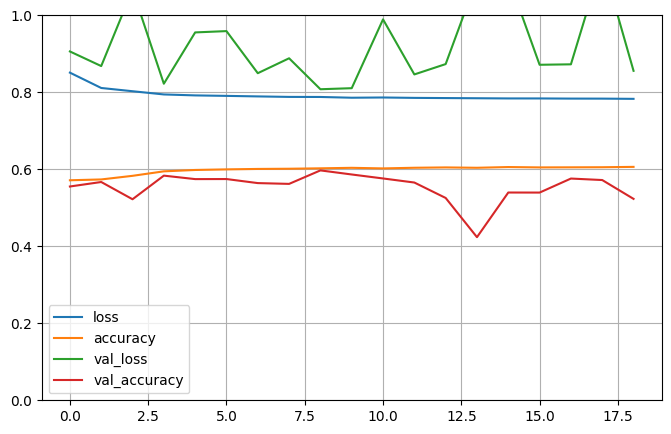

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
#evaluate the model and use it
train_loss, train_acc =model.evaluate(data_train, labels_train)

6515/6515 [==============================] - 15s 2ms/step - loss: 0.8014 - accuracy: 0.5990


In [ ]:
test_loss, test_acc =model.evaluate(data_test, test_labels)

2715/2715 [==============================] - 12s 4ms/step - loss: 0.6510 - accuracy: 0.8218


In [ ]:
val_loss, val_acc =model.evaluate(data_val, labels_val)

1629/1629 [==============================] - 8s 5ms/step - loss: 0.8079 - accuracy: 0.5971


In [ ]:
data_new =data_test[:3]
y_proba = model.predict(data_new)
y_proba.round(2)
model.predict(data_new)

1/1 [==============================] - 0s 37ms/step


array([[3.8635195e-10, 2.3275200e-02, 6.1478156e-01, 3.6194319e-01],
       [4.1446528e-13, 2.2285361e-02, 8.5460198e-01, 1.2311263e-01],
       [2.1496639e-08, 5.6173477e-02, 5.0798380e-01, 4.3584263e-01]],
      dtype=float32)

In [ ]:
test_labels[:3]

,damage_grade
0,3
1,2
2,2


# neural2


In [ ]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=data_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

In [ ]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [ ]:
norm_layer.adapt(data_train)
history = model.fit(data_train, labels_train, epochs=20,
                    validation_data=(data_val, labels_val))

Epoch 1/20
6515/6515 [==============================] - 43s 6ms/step - loss: 0.3117 - root_mean_squared_error: 0.5583 - val_loss: 0.2890 - val_root_mean_squared_error: 0.5376
Epoch 2/20
6515/6515 [==============================] - 24s 4ms/step - loss: 0.2799 - root_mean_squared_error: 0.5291 - val_loss: 0.2760 - val_root_mean_squared_error: 0.5254
Epoch 3/20
6515/6515 [==============================] - 19s 3ms/step - loss: 0.2693 - root_mean_squared_error: 0.5189 - val_loss: 0.2697 - val_root_mean_squared_error: 0.5193
Epoch 4/20
6515/6515 [==============================] - 18s 3ms/step - loss: 0.2583 - root_mean_squared_error: 0.5083 - val_loss: 0.2614 - val_root_mean_squared_error: 0.5112
Epoch 5/20
6515/6515 [==============================] - 18s 3ms/step - loss: 0.2543 - root_mean_squared_error: 0.5042 - val_loss: 0.2551 - val_root_mean_squared_error: 0.5051
Epoch 6/20
6515/6515 [==============================] - 26s 4ms/step - loss: 0.2521 - root_mean_squared_error: 0.5021 - val_l

In [ ]:
mse_test, rmse_test = model.evaluate(data_test, data_test_labels)

In [ ]:
y_pred = model.predict(X_new)

# keras_tuner

In [ ]:
!pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
data_labels.shape

(260601, 1)

In [ ]:
# Create the random search tuner
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_project", project_name="my_rnd_search", seed=42)

# Search for the best hyperparameters
random_search_tuner.search(data_train, labels_train, epochs=20,
                           validation_data=(data_val, labels_val))

Trial 10 Complete [00h 08m 03s]
val_accuracy: 0.6031157970428467

Best val_accuracy So Far: 0.6159897446632385
Total elapsed time: 01h 20m 18s


In [ ]:
top_models = random_search_tuner.get_best_models()
best_model = top_models[0]

In [ ]:
top_params = random_search_tuner.get_best_hyperparameters()
top_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 124,
 'learning_rate': 0.0005509513888645584,
 'optimizer': 'adam'}

In [ ]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 08 summary
Hyperparameters:
n_hidden: 7
n_neurons: 124
learning_rate: 0.0005509513888645584
optimizer: adam
Score: 0.6159897446632385


In [ ]:
best_trial.metrics.get_last_value("val_accuracy")

0.6159897446632385

In [ ]:
data_test=test_values_new
data_test_labels=test_labels

In [ ]:
test_loss, test_accuracy = best_model.evaluate(data_test, data_test_labels)

2715/2715 [==============================] - 10s 3ms/step - loss: 0.6534 - accuracy: 0.7782


# keras_tuner 2


In [ ]:
import keras_tuner as kt

def build_model2(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=40, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
# Create the random search tuner
random_search_tuner2 = kt.RandomSearch(
    build_model2, objective="val_accuracy", max_trials=10, overwrite=True,
    directory="my_project2", project_name="my_rnd_search", seed=42)

# Search for the best hyperparameters
random_search_tuner2.search(data_train, labels_train, epochs=20,
                           validation_data=(data_val, labels_val))

Trial 10 Complete [00h 18m 29s]
val_accuracy: 0.5759674310684204

Best val_accuracy So Far: 0.5759674310684204
Total elapsed time: 02h 43m 56s
